<a href="https://colab.research.google.com/github/project-ida/two-state-quantum-systems/blob/master/05-many-two-state-systems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <a href="https://nbviewer.jupyter.org/github/project-ida/two-state-quantum-systems/blob/master/05-many-two-state-systems.ipynb" target="_parent"><img src="https://nbviewer.jupyter.org/static/img/nav_logo.svg" alt="Open In nbviewer" width="100"/></a>

# 5 - Many two state systems

> TODO: Intro

In [29]:
# Libraries
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from IPython.display import Image
import gif
import numpy as np
import pandas as pd
from qutip import *
from qutip.piqs import *
from qutip.cy.piqs import j_min, j_vals, m_vals
import warnings
warnings.filterwarnings('ignore')
from itertools import product
import os
from fractions import Fraction

In [2]:
spins = spin_algebra(2)

In [3]:
spins[2]

[Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
 Qobj data =
 [[ 0.5  0.   0.   0. ]
  [ 0.   0.5  0.   0. ]
  [ 0.   0.  -0.5  0. ]
  [ 0.   0.   0.  -0.5]],
 Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
 Qobj data =
 [[ 0.5  0.   0.   0. ]
  [ 0.  -0.5  0.   0. ]
  [ 0.   0.   0.5  0. ]
  [ 0.   0.   0.  -0.5]]]

In [4]:
A=0.1

In [5]:
H = spins[2][0] + spins[2][1] + A*spins[0][0] + A*spins[0][1]

In [6]:
H

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 1.    0.05  0.05  0.  ]
 [ 0.05  0.    0.    0.05]
 [ 0.05  0.    0.    0.05]
 [ 0.    0.05  0.05 -1.  ]]

In [7]:
def make_df_for_energy_scan(label_param, min_param, max_param, num_param, num_levels):
    
    # creates an empty dictionary to store the row/column information
    d = {}
    
    # creates array of parameter values that we want to scan through
    param_values = np.linspace(min_param, max_param, num_param)
    
    # stores the parameter scan label and values (this will soon become the first column in the dataframe)
    d[label_param] = param_values
    
    # creates empty columns to store the eigenvalues for the different levels later on
    # num_levels will be the number of rows of H (or any of the operators that make up H)
    for i in range(num_levels):
        d[f"level_{i}"] = np.zeros(num_param)
     
    # creates the dataframe
    df = pd.DataFrame(data=d)
    
    return df

In [8]:
df = make_df_for_energy_scan("$\delta$/A", -40,40, 100, spins[2][0].shape[0])

In [9]:
spins[2][1]+spins[2][0]


Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 1.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0. -1.]]

In [10]:
A=0.1
for i, row in df.iterrows():
    H =  row[ "$\delta$/A"]*A*spins[2][0] + row[ "$\delta$/A"]*A*spins[2][1] + A*spins[0][0] + A*spins[0][1]
    evals, ekets = H.eigenstates()
    df.iloc[i,1:] = evals

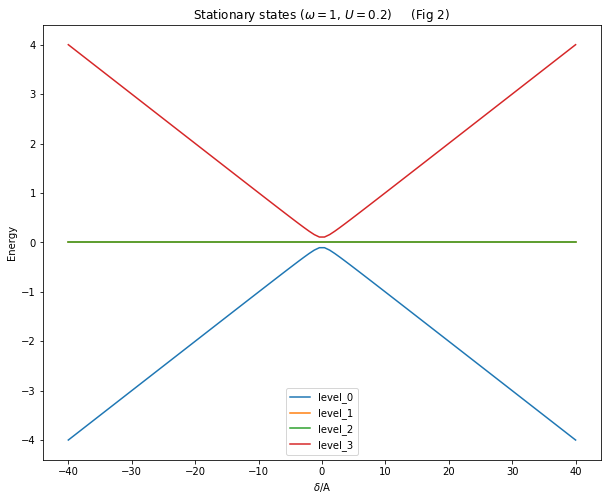

In [22]:
df.plot(x="$\delta$/A",figsize=(10,8),legend=True, 
        title="Stationary states ($\omega=1$, $U=0.2$)     (Fig 2)");
plt.ylabel("Energy");

In [23]:
delE = 1

In [24]:
A = 0.01

In [25]:
H = delE*spins[2][0] + delE*spins[2][1] + A*spins[0][0] + A*spins[0][1]

In [26]:
H

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 1.     0.005  0.005  0.   ]
 [ 0.005  0.     0.     0.005]
 [ 0.005  0.     0.     0.005]
 [ 0.     0.005  0.005 -1.   ]]

In [27]:
evals, ekets = H.eigenstates()

In [28]:
evals

array([-1.0000500e+00, -8.8817842e-16,  0.0000000e+00,  1.0000500e+00])

In [29]:
ekets

array([Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 2.49981252e-05]
 [-4.99975002e-03]
 [-4.99975002e-03]
 [ 9.99975002e-01]],
       Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.00707071]
 [-0.70707143]
 [-0.70707143]
 [-0.00707071]],
       Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.        ]
 [-0.70710678]
 [ 0.70710678]
 [ 0.        ]],
       Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[9.99975002e-01]
 [4.99975002e-03]
 [4.99975002e-03]
 [2.49981252e-05]]], dtype=object)

In [30]:
J = jspin(2, basis="uncoupled")

In [31]:
Jx = J[0]
Jy = J[1]
Jz = J[2]

In [32]:
H = delE*Jz + A*Jx

In [33]:
H

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 1.     0.005  0.005  0.   ]
 [ 0.005  0.     0.     0.005]
 [ 0.005  0.     0.     0.005]
 [ 0.     0.005  0.005 -1.   ]]

In [34]:
J2 = Jx**2 + Jy**2 + Jz**2

In [35]:
J2

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[2. 0. 0. 0.]
 [0. 1. 1. 0.]
 [0. 1. 1. 0.]
 [0. 0. 0. 2.]]

In [36]:
commutator(H,J2)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

In [37]:
J2.transform(ekets)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[2. 0. 0. 0.]
 [0. 2. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 2.]]

In [38]:
J = jspin(2)

In [39]:
Jx = J[0]
Jy = J[1]
Jz = J[2]

In [40]:
A = 0.01

In [41]:
H = delE*Jz + A*Jx

In [42]:
H

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 1.          0.00707107  0.          0.        ]
 [ 0.00707107  0.          0.00707107  0.        ]
 [ 0.          0.00707107 -1.          0.        ]
 [ 0.          0.          0.          0.        ]]

In [43]:
J2 = Jx**2 + Jy**2 + Jz**2

In [44]:
J2

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[2. 0. 0. 0.]
 [0. 2. 0. 0.]
 [0. 0. 2. 0.]
 [0. 0. 0. 0.]]

In [45]:
from qutip.cy.piqs import j_min, j_vals, m_vals

In [46]:
N = 2
i=0

nm_list = []
j_index = {}

js = j_vals(N)[::-1]
for j in js:
    j_index[j] = []
    ms = m_vals(j)[::-1]
    for m in ms:
        j_index[j].append(i)
        nm_list.append((j,m))
        i+=1

In [47]:
nm_list

[(1.0, 1.0), (1.0, 0.0), (1.0, -1.0), (0.0, -0.0)]

In [48]:
def make_braket_labels(nm_list):
    bra_labels = ["$\langle$"+str(n)+", "+str(m)+" |" for (n,m) in nm_list]
    ket_labels = ["| "+str(n)+", "+str(m)+"$\\rangle$" for (n,m) in nm_list]
    return bra_labels, ket_labels

In [49]:
bra_labels, ket_labels = make_braket_labels(nm_list)

In [50]:
df = make_df_for_energy_scan("$\delta$/A", -4,4, 100, Jz1.shape[0])

NameError: name 'Jz1' is not defined

In [51]:
A=0.1
for i, row in df.iterrows():
    H =  row[ "$\delta$/A"]*A*Jz1 + A*Jx1
    evals, ekets = H.eigenstates()
    df.iloc[i,1:] = evals

NameError: name 'Jz1' is not defined

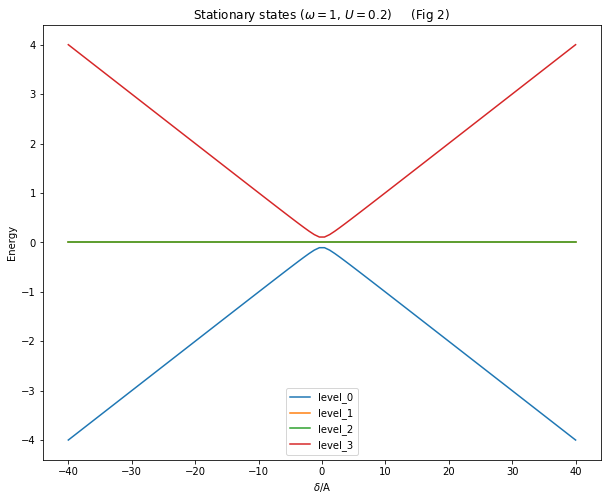

In [52]:
df.plot(x="$\delta$/A",figsize=(10,8),legend=True, 
        title="Stationary states ($\omega=1$, $U=0.2$)     (Fig 2)");
plt.ylabel("Energy");

[Wolfram alpha eigenvalues](https://www.wolframalpha.com/input/?i=%7B%7B1%2Ca%2C0%7D%2C%7Ba%2C0%2Ca%7D%2C%7B0%2Ca%2C-1%7D%7D+eigenvalues)

In [106]:
J = jspin(2)

In [107]:
Jx = J[0]
Jz = J[2]

In [153]:
def j_states_list(num_tss):
    i=0
    
    jm_list = []
    j_index = {}

    js = j_vals(N)[::-1]
    
    for j in js:
        j_index[j] = []
        ms = m_vals(j)[::-1]
        for m in ms:
            j_index[j].append(i)
            jm_list.append((j,m))
            i+=1
    return j_index, jm_list

In [154]:
j_index, jm_list = j_states_list(2)

In [155]:
j=0
Jz_j = Jz.extract_states(j_index[j])
Jx_j = Jx.extract_states(j_index[j])

In [156]:
max_bosons = 2
number   = tensor(num(max_bosons+1), qeye(Jz_j.shape[0]))
Jz_tensor = tensor(qeye(max_bosons+1), Jz_j)
Jx_tensor = tensor(qeye(max_bosons+1), Jx_j)
a = tensor(destroy(max_bosons+1), qeye(Jz_j.shape[0]))

interaction  =    (a.dag() + a) * Jx_tensor

bosons = number+0.5

In [182]:
from qutip.dimensions import (
    type_from_dims, flatten, unflatten, enumerate_flat, deep_remove, deep_map, is_scalar, collapse_dims_oper)

In [185]:
(a.dag() + a)

Quantum object: dims = [[3, 1], [3, 1]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[0.         1.         0.        ]
 [1.         0.         1.41421356]
 [0.         1.41421356 0.        ]]

In [170]:
Jz_tensor

Quantum object: dims = [[3, 1], [3, 1]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

In [186]:
tensor_contract(Jz_tensor)

Quantum object: dims = [[3, 1], [3, 1]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

In [205]:
test = (a.dag() + a)*Jx_tensor

In [208]:
test.dims[0][0]

3

In [167]:
collapse_dims_oper

NameError: name 'collapse_dims_oper' is not defined

In [202]:
interaction.dims = [[3,1],[3,1]]

In [30]:
interaction

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[0.]]

In [259]:
def j_states_list(num_tss):
    i=0
    
    jm_list = []
    j_index = {}

    js = j_vals(num_tss)[::-1]
    
    for j in js:
        j_index[j] = []
        ms = m_vals(j)[::-1]
        for m in ms:
            j_index[j].append(i)
            jm_list.append((j,m))
            i+=1
    return j_index, jm_list

In [260]:
def make_braket_labels(njm_list):
    bra_labels = ["$\langle$"+str(n)+", "+str(Fraction(j))+", "+str(Fraction(m))+" |" for (n,j,m) in njm_list]
    ket_labels = ["| "+str(n)+", "+str(Fraction(j))+", "+str(Fraction(m))+"$\\rangle$" for (n,j,m) in njm_list]
    return bra_labels, ket_labels

In [261]:
def make_operators(num_tss, max_bosons, j, parity=0):
    
    Js = jspin(num_tss)
    Jx = Js[0]
    Jz = Js[2]
    
    j_index, jm_list = j_states_list(num_tss)
    
    num_ms = len(m_vals(j))
    Jz = Jz.extract_states(j_index[j])
    Jx = Jx.extract_states(j_index[j])
    jm_list = [jm_list[i] for i in j_index[j]]
    
    
    a        = tensor(destroy(max_bosons+1), qeye(num_ms))     # tensorised boson destruction operator
    number   = tensor(num(max_bosons+1), qeye(num_ms))         # tensorised boson number operator
    Jz       = tensor(qeye(max_bosons+1), Jz)                  # tensorised sigma_x operator 1
    Jx       = tensor(qeye(max_bosons+1), Jx)                  # tensorised sigma_x operator 1
    
    bosons         =   (number+0.5)                                # boson energy operator
    interaction  =    (a.dag() + a) * Jx                        # interaction energy operator
    
    if(num_ms==1):
        interaction.dims = [[max_bosons+1,1],[max_bosons+1,1]]
    
    M = tensor(qeye(max_bosons+1),qdiags(m_vals(j)[::-1],0))    # M operator
    
    if((2*j)%2==0):
        P = (1j*np.pi*M).expm()*(1j*np.pi*number).expm()                  # parity operator 
    else:
        P = 1j*(1j*np.pi*M).expm()*(1j*np.pi*number).expm() 
    
    
    # map from QuTiP number states to |n,±, ±> states
    possible_ns = range(0, max_bosons+1)
    njm_list = [(n,j,m) for (n,(j,m)) in product(possible_ns, jm_list)]
    
    # only do parity extraction if a valid parity is being used
    if (parity==1) | (parity==-1):
        p           = np.where(P.diag()==parity)[0]
        
        Jz     = Jz.extract_states(p)
        Jx     = Jx.extract_states(p)
        bosons          = bosons.extract_states(p)
        number          = number.extract_states(p)
        interaction   = interaction.extract_states(p)
        P               = P.extract_states(p)
        njm_list         = [njm_list[i] for i in p]
    
    
    return Jz, bosons, interaction, number, njm_list, P

In [276]:
n = 5

In [288]:
Jx = jspin(n,"x")

In [289]:
Jx

Quantum object: dims = [[12], [12]], shape = (12, 12), type = oper, isherm = True
Qobj data =
[[0.         1.11803399 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [1.11803399 0.         1.41421356 0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         1.41421356 0.         1.5        0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.         1.5        0.         1.41421356 0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         1.41421356 0.         1.11803399
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         1.11803399 0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.8660254  0.         0.         0.         0.     

In [286]:
Jp = jspin(n,"+")
Jm = jspin(n,"-")

In [287]:
(Jp+Jm)

Quantum object: dims = [[12], [12]], shape = (12, 12), type = oper, isherm = True
Qobj data =
[[0.         2.23606798 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [2.23606798 0.         2.82842712 0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         2.82842712 0.         3.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.         3.         0.         2.82842712 0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         2.82842712 0.         2.23606798
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         2.23606798 0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         1.73205081 0.         0.         0.         0.     

In [274]:
j_index, jm_list = j_states_list(3)

In [84]:
j_index

{1.5: [0, 1, 2, 3], 0.5: [4, 5]}

In [85]:
jm_list

[(1.5, 1.5), (1.5, 0.5), (1.5, -0.5), (1.5, -1.5), (0.5, 0.5), (0.5, -0.5)]

In [86]:
j_vals(3)

array([0.5, 1.5])

In [68]:
Js = jspin(3)
Jx = Js[0]
Jz = Js[2]

In [69]:
j = 0.5

In [70]:
Jz = Jz.extract_states(j_index[j])

In [64]:
Jz

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 0.5  0. ]
 [ 0.  -0.5]]

In [303]:
Jz, bosons, interaction, number, njm_list, P = make_operators(6, 10, 3, 0)

df = make_df_for_energy_scan("$\Delta E$", -4, 4, 201, Jz.shape[0])

for i, row in df.iterrows():
    H =  row["$\Delta E$"]*Jz + 1*bosons + 0.2*interaction*2
    evals, ekets = H.eigenstates()
    df.iloc[i,1:] = evals 

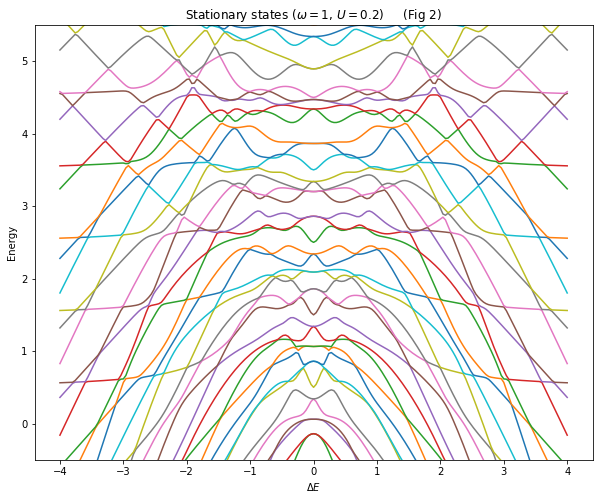

In [305]:
df.plot(x="$\Delta E$",figsize=(10,8),legend=False, ylim=[-0.5,5.5],
        title="Stationary states ($\omega=1$, $U=0.2$)     (Fig 2)");
plt.ylabel("Energy");

In [309]:
## EVEN

Jz, bosons, interaction, number, njm_list, P = make_operators(6, 10, 3, 1)

df_even = make_df_for_energy_scan("$\Delta E$", -4, 4, 201, Jz.shape[0])

for i, row in df_even.iterrows():
    H =  row["$\Delta E$"]*Jz + 1*bosons + 0.2*interaction
    evals, ekets = H.eigenstates()
    df_even.iloc[i,1:] = evals 

In [310]:
## ODD

Jz, bosons, interaction, number, njm_list, P = make_operators(6, 10, 3, -1)

df_odd = make_df_for_energy_scan("$\Delta E$", -4, 4, 201, Jz.shape[0])

for i, row in df_odd.iterrows():
    H =  row["$\Delta E$"]*Jz + 1*bosons + 0.2*interaction
    evals, ekets = H.eigenstates()
    df_odd.iloc[i,1:] = evals 

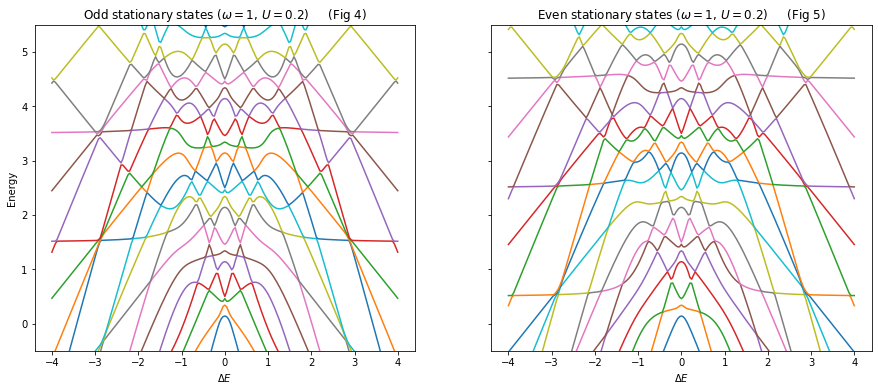

In [311]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,6), sharey=True)


df_odd.plot(x="$\Delta E$",ylim=[-0.5,5.5],legend=False, 
        title="Odd stationary states ($\omega=1$, $U=0.2$)     (Fig 4)",  ax=axes[0]);

df_even.plot(x="$\Delta E$",ylim=[-0.5,5.5],legend=False, 
        title="Even stationary states ($\omega=1$, $U=0.2$)     (Fig 5)",  ax=axes[1]);

axes[0].set_ylabel("Energy");

In [242]:
bra_labels, ket_labels = make_braket_labels(njm_list)

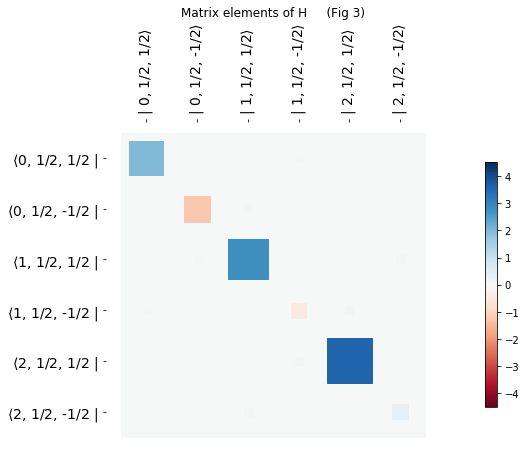

In [243]:
f, ax = hinton(H, xlabels=ket_labels, ylabels=bra_labels)
ax.tick_params(axis='x',labelrotation=90,)
ax.set_title("Matrix elements of H     (Fig 3)");

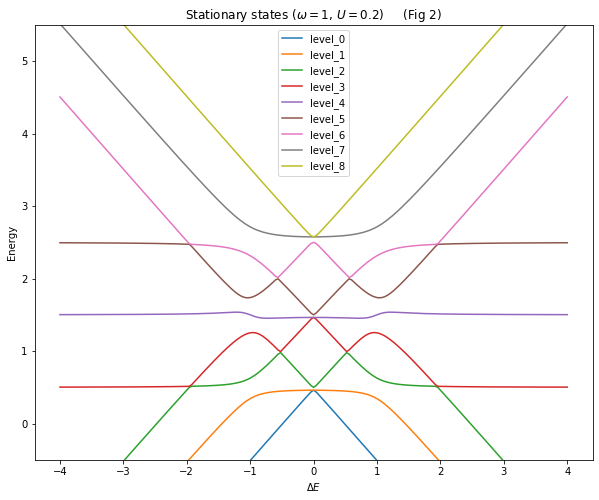

In [21]:
df.plot(x="$\Delta E$",figsize=(10,8),legend=True, ylim=[-0.5,5.5],
        title="Stationary states ($\omega=1$, $U=0.2$)     (Fig 2)");
plt.ylabel("Energy");

In [69]:
jm_list

[(1.0, 1.0), (1.0, 0.0), (1.0, -1.0), (0.0, -0.0)]

In [72]:
 possible_ns = range(0, max_bosons+1)

In [73]:
max_bosons = 2

In [76]:
njm_list = [(n,j,m) for (n,(j,m)) in product(possible_ns, jm_list)]

In [77]:
njm_list

[(0, 1.0, 1.0),
 (0, 1.0, 0.0),
 (0, 1.0, -1.0),
 (0, 0.0, -0.0),
 (1, 1.0, 1.0),
 (1, 1.0, 0.0),
 (1, 1.0, -1.0),
 (1, 0.0, -0.0),
 (2, 1.0, 1.0),
 (2, 1.0, 0.0),
 (2, 1.0, -1.0),
 (2, 0.0, -0.0)]

In [67]:
product([range(0, max_bosons+1),range(0, max_bosons+1)])

In [60]:
df = make_df_for_energy_scan("$\Delta E$", -4, 4, 201, Jz_tensor.shape[0])

for i, row in df.iterrows():
    H =  row["$\Delta E$"]*Jz_tensor + 1*bosons + 0.2*interaction
    evals, ekets = H.eigenstates()
    df.iloc[i,1:] = evals 

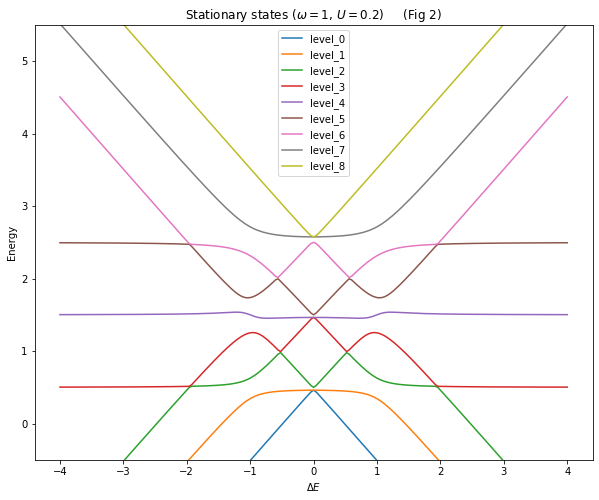

In [61]:
df.plot(x="$\Delta E$",figsize=(10,8),legend=True, ylim=[-0.5,5.5],
        title="Stationary states ($\omega=1$, $U=0.2$)     (Fig 2)");
plt.ylabel("Energy");

In [62]:
Mt = tensor(qeye(max_bosons+1),qdiags(m_vals(1)[::-1],0))

In [63]:
Mt

Quantum object: dims = [[3, 3], [3, 3]], shape = (9, 9), type = oper, isherm = True
Qobj data =
[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.]]

In [64]:
qeye(3)

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

In [65]:
m_vals(1)[::-1]*qeye(3)

array([ 1.+0.j,  0.+0.j, -1.+0.j])

In [74]:
P = (1j*np.pi*Mt).expm()*(1j*np.pi*number).expm()

In [75]:
P

Quantum object: dims = [[3, 3], [3, 3]], shape = (9, 9), type = oper, isherm = True
Qobj data =
[[-1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.]]

In [76]:
commutator(P,H)

Quantum object: dims = [[3, 3], [3, 3]], shape = (9, 9), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]

In [ ]:
def make_operators(max_bosons, parity=0, J):
    
    a        = tensor(destroy(max_bosons+1), qeye(2), qeye(2))     # tensorised boson destruction operator
    number   = tensor(num(max_bosons+1), qeye(2), qeye(2))         # tensorised boson number operator
    sx1      = tensor(qeye(max_bosons+1), sigmax(), qeye(2))       # tensorised sigma_x operator 1
    sx2      = tensor(qeye(max_bosons+1), qeye(2), sigmax())       # tensorised sigma_x operator 2
    sz1      = tensor(qeye(max_bosons+1), sigmaz(), qeye(2))        # tensorised sigma_z operator 1 
    sz2      = tensor(qeye(max_bosons+1), qeye(2), sigmaz())        # tensorised sigma_z operator 2
    sy1      = tensor(qeye(max_bosons+1), sigmay(), qeye(2))       # tensorised sigma_x operator 1
    sy2      = tensor(qeye(max_bosons+1), qeye(2), sigmay())       # tensorised sigma_x operator 2
    
    two_state_1    =    1/2*sz1                                    # two state system energy operator 1
    two_state_2    =    1/2*sz2                                    # two state system energy operator 2
    bosons         =   (number+0.5)                                # boson energy operator
    interaction_1  =    (a.dag() + a) * sx1                        # interaction energy operator 1
    interaction_2  =    (a.dag() + a) * sx2                        # interaction energy operator 2 
    
    P = sz1*sz2*(1j*np.pi*number).expm()                           # parity operator 
    
    # map from QuTiP number states to |n,±, ±> states
    possible_ns = range(0, max_bosons+1)
    possible_ms = ["+","-"]
    nm_list = [(n,m1,m2) for (n,m1,m2) in product(possible_ns, possible_ms, possible_ms)]
    
    # only do parity extraction if a valid parity is being used
    if (parity==1) | (parity==-1):
        p           = np.where(P.diag()==parity)[0]
        
        two_state_1     = two_state_1.extract_states(p)
        two_state_2     = two_state_2.extract_states(p)
        bosons          = bosons.extract_states(p)
        number          = number.extract_states(p)
        interaction_1   = interaction_1.extract_states(p)
        interaction_2   = interaction_2.extract_states(p)
        P               = P.extract_states(p)
        nm_list         = [nm_list[i] for i in p]
    
    
    return two_state_1, two_state_2, bosons, interaction_1, interaction_2, number, nm_list, P